In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, TargetEncoder, OrdinalEncoder, OneHotEncoder

In [4]:
# Importing the dataset:
column_names = ['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income']

df = pd.read_csv('adult.csv', skipinitialspace=True)
df_test = pd.read_csv('adult.test.csv', header=None, names=column_names, skipinitialspace=True)

In [5]:
print(df.head(15)) # Short overview of the dataset. We can already notice missed values.

    Age         Workclass  Final Weight     Education  EducationNum  \
0    39         State-gov         77516     Bachelors            13   
1    50  Self-emp-not-inc         83311     Bachelors            13   
2    38           Private        215646       HS-grad             9   
3    53           Private        234721          11th             7   
4    28           Private        338409     Bachelors            13   
5    37           Private        284582       Masters            14   
6    49           Private        160187           9th             5   
7    52  Self-emp-not-inc        209642       HS-grad             9   
8    31           Private         45781       Masters            14   
9    42           Private        159449     Bachelors            13   
10   37           Private        280464  Some-college            10   
11   30         State-gov        141297     Bachelors            13   
12   23           Private        122272     Bachelors            13   
13   3

In [6]:
print(df_test.head(15)) # Dots inside the Income column need to be removed.

    Age         Workclass  Final Weight     Education  EducationNum  \
0    25           Private        226802          11th             7   
1    38           Private         89814       HS-grad             9   
2    28         Local-gov        336951    Assoc-acdm            12   
3    44           Private        160323  Some-college            10   
4    18                 ?        103497  Some-college            10   
5    34           Private        198693          10th             6   
6    29                 ?        227026       HS-grad             9   
7    63  Self-emp-not-inc        104626   Prof-school            15   
8    24           Private        369667  Some-college            10   
9    55           Private        104996       7th-8th             4   
10   65           Private        184454       HS-grad             9   
11   36       Federal-gov        212465     Bachelors            13   
12   26           Private         82091       HS-grad             9   
13   5

In [7]:
# Deleting dots from the Income column of test dataset
df_test["Income"] = df_test["Income"].str.rstrip('.').astype('category')

#  Final weight tells the proportion of the population that has the same set of features.
# We do't need final weight feature for model training, so it will be dropped. 
df = df.drop("Final Weight", axis=1)
df_test = df_test.drop('Final Weight', axis=1)

print(df.shape)
print(df_test.shape)

# Let's drop duplicates from the dataframe
df = df.drop_duplicates()
df_test.drop_duplicates()

# Defining numerical and categorical features
numerical_cols = ["Age", "Capital Gain", "capital loss", "Hours per Week", "EducationNum"]
categorical_cols = ["Education", "Workclass", "Relationship", "Occupation", "Marital Status", "Gender", "Race", "Native Country"]

# Let's look at the structure of categorical features:
for column in categorical_cols:
    print(df[column].value_counts(dropna=False).to_frame())

# Featues "Workclass", "Occupation" and "Native Country" have missing values, so we are dropping them:

def drop_missing_vals(dframe, column):
    dframe_cleaned = dframe.drop(dframe[dframe[column] == '?'].index)
    return dframe_cleaned
    
for column in ["Workclass", "Occupation", "Native Country"]:
    df = drop_missing_vals(df, column)
    df_test = drop_missing_vals(df_test, column)

# Replace target variable with binary values.
df['Income'] = df['Income'].replace({'<=50K': 0, '>50K': 1})
df_test['Income'] = df_test['Income'].replace({'<=50K': 0, '>50K': 1})

print(df.shape)
print(df_test.shape)

(32561, 14)
(16281, 14)
              count
Education          
HS-grad        8886
Some-college   6378
Bachelors      4810
Masters        1653
Assoc-voc      1331
11th           1056
Assoc-acdm     1053
10th            867
7th-8th         629
Prof-school     566
9th             507
12th            414
Doctorate       402
5th-6th         328
1st-4th         166
Preschool        50
                  count
Workclass              
Private           19621
Self-emp-not-inc   2473
Local-gov          2040
?                  1632
State-gov          1272
Self-emp-inc       1091
Federal-gov         946
Without-pay          14
Never-worked          7
                count
Relationship         
Husband         11506
Not-in-family    7684
Own-child        4096
Unmarried        3317
Wife             1528
Other-relative    965
                   count
Occupation              
Prof-specialty      3885
Exec-managerial     3719
Adm-clerical        3340
Craft-repair        3298
Sales               3270
O

/var/folders/0m/n25rchls0js112cfhj2dm49m0000gn/T/ipykernel_88422/418605517.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Income'] = df['Income'].replace({'<=50K': 0, '>50K': 1})
/var/folders/0m/n25rchls0js112cfhj2dm49m0000gn/T/ipykernel_88422/418605517.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Income'] = df_test['Income'].replace({'<=50K': 0, '>50K': 1})
/var/folders/0m/n25rchls0js112cfhj2dm49m0000gn/T/ipykernel_88422/418605517.py:36: FutureWarning: The behavior of Series.replace (and DataFrame.repla

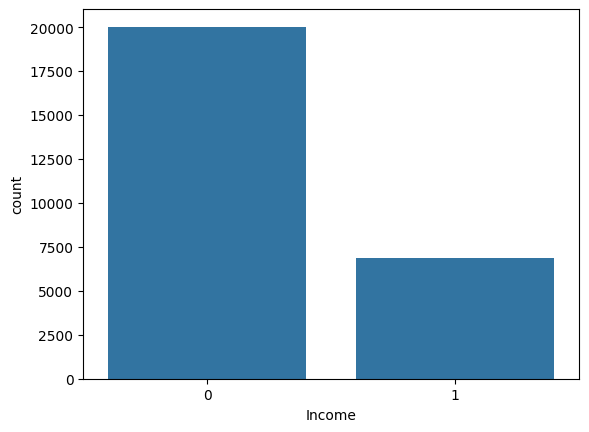

In [8]:
# Plotting the target variable:
sns.countplot(data=df, x="Income")
plt.show()

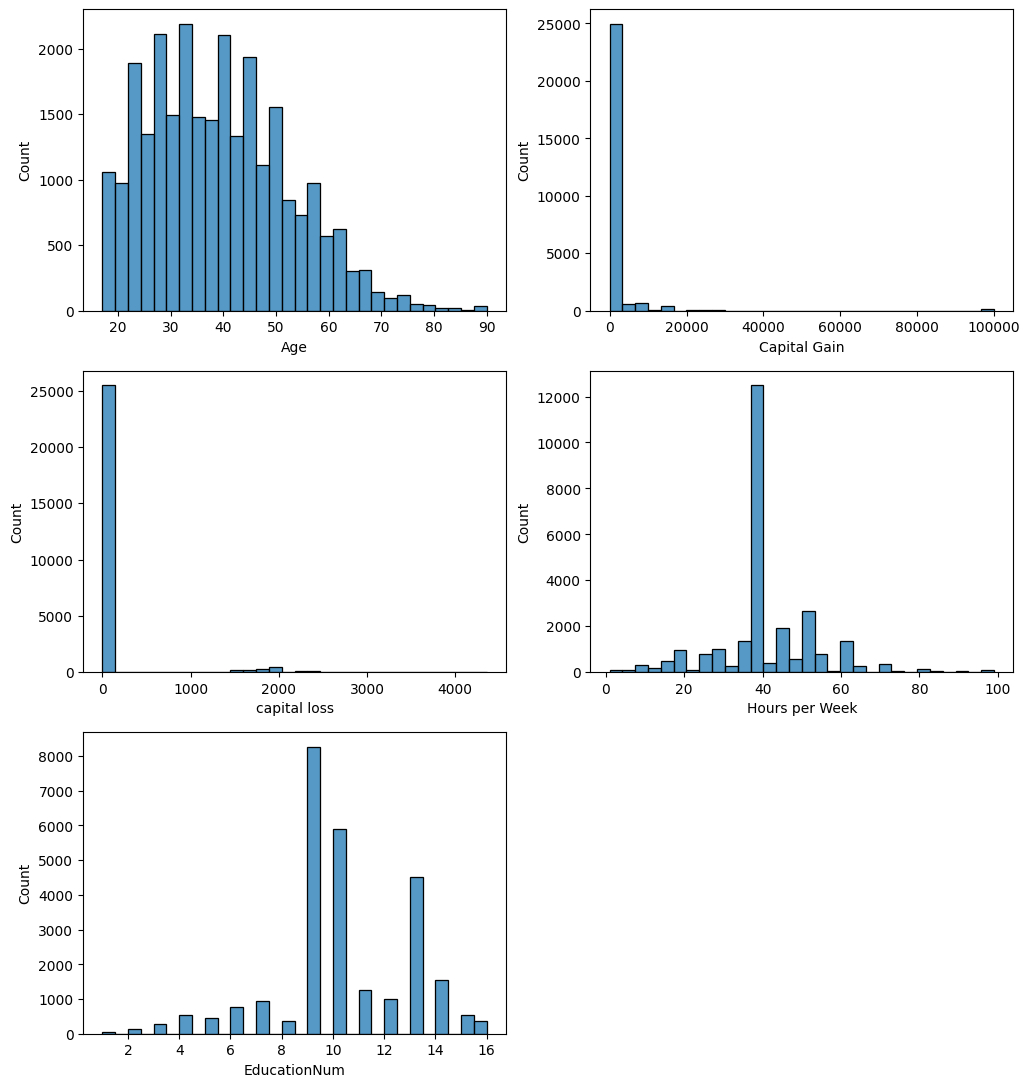

In [9]:
# Plotting numerical features
plt.figure(figsize=(12, 18))
for i, column in enumerate(numerical_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=column, bins=30)
plt.show()

In [10]:
# There is a suspicious outlier equal to almost 100000 in Capital Gain column, let's check it:

print(sorted(df["Capital Gain"].unique(), reverse=True))

[np.int64(99999), np.int64(41310), np.int64(34095), np.int64(27828), np.int64(25236), np.int64(25124), np.int64(22040), np.int64(20051), np.int64(18481), np.int64(15831), np.int64(15024), np.int64(15020), np.int64(14344), np.int64(14084), np.int64(13550), np.int64(11678), np.int64(10605), np.int64(10566), np.int64(10520), np.int64(9562), np.int64(9386), np.int64(8614), np.int64(7978), np.int64(7896), np.int64(7688), np.int64(7443), np.int64(7430), np.int64(7298), np.int64(6849), np.int64(6767), np.int64(6723), np.int64(6514), np.int64(6497), np.int64(6418), np.int64(6360), np.int64(6097), np.int64(5721), np.int64(5556), np.int64(5455), np.int64(5178), np.int64(5060), np.int64(5013), np.int64(4934), np.int64(4931), np.int64(4865), np.int64(4787), np.int64(4687), np.int64(4650), np.int64(4508), np.int64(4416), np.int64(4386), np.int64(4101), np.int64(4064), np.int64(3942), np.int64(3908), np.int64(3887), np.int64(3818), np.int64(3781), np.int64(3674), np.int64(3471), np.int64(3464), np.i

In [11]:
# It can be seen from the output that there are no values close to 99999. 99999 is often used to indicate NaN value, so ve will drop these rows:
df = df.drop(df[df["Capital Gain"] == 99999].index)
df_test = df_test.drop(df_test[df_test["Capital Gain"] == 99999].index)

There are no strong correlations between numerical features.

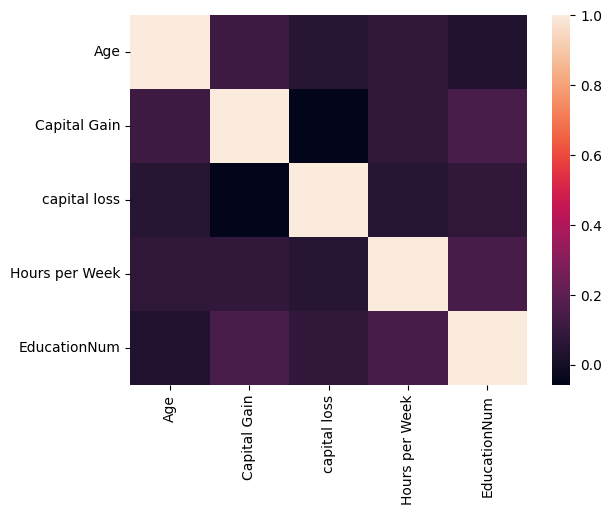

In [12]:
# Let's check the correlation between numerical variables:
corr = df[numerical_cols].corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
);

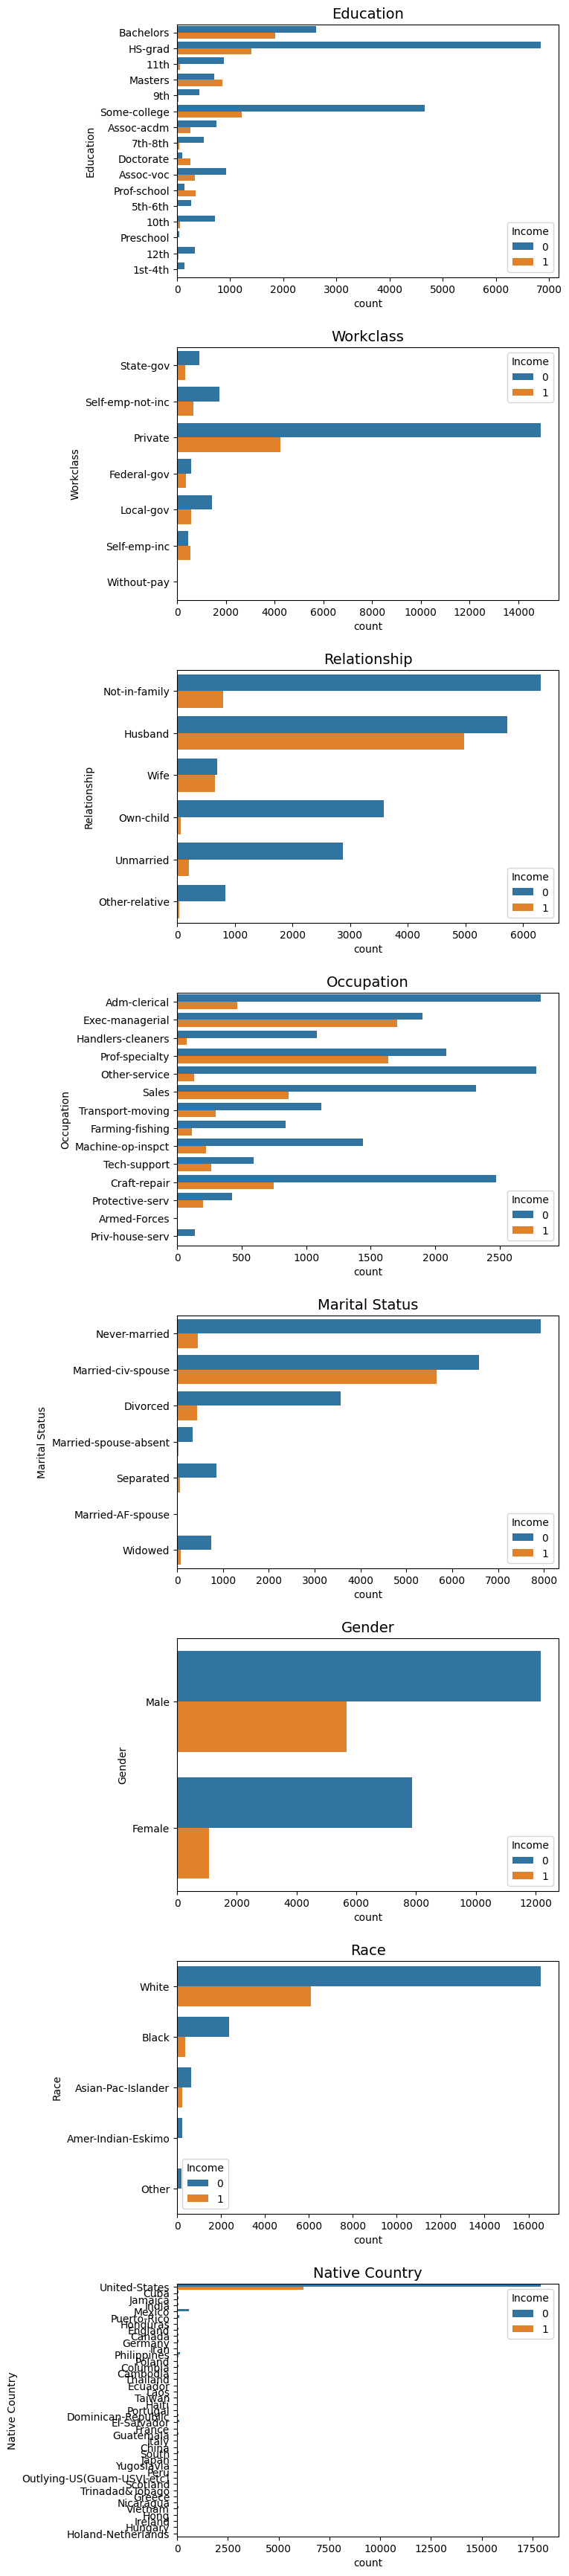

In [13]:
# Now let's make plots for categorical data:
plt.figure(figsize=(8, 35))

for i, column in enumerate(categorical_cols):
    plt.subplot(8, 1, i+1)
    plt.title(column, fontsize=14)
    sns.countplot(data=df, hue="Income", y=column)
    plt.tight_layout(pad=2.0)
plt.show()

In [14]:
# Apply log transformation to capital gain and capiral loss, because those features are highly skewed:

df['Capital Gain'] = np.log1p(df['Capital Gain'])
df['Capital Gain'] = np.log1p(df['capital loss'])

df_test['Capital Gain'] = np.log1p(df_test['Capital Gain'])
df_test['capital loss'] = np.log1p(df_test['capital loss'])

In [15]:
# Standartizing numerical features:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) 

print(df[numerical_cols].head(10))

        Age  Capital Gain  capital loss  Hours per Week  EducationNum
0 -0.000737     -0.236507     -0.232082       -0.090416      1.099143
1  0.833212     -0.236507     -0.232082       -2.280682      1.099143
2 -0.076550     -0.236507     -0.232082       -0.090416     -0.432097
3  1.060652     -0.236507     -0.232082       -0.090416     -1.197717
4 -0.834685     -0.236507     -0.232082       -0.090416      1.099143
5 -0.152364     -0.236507     -0.232082       -0.090416      1.481953
6  0.757398     -0.236507     -0.232082       -2.037319     -1.963337
7  0.984838     -0.236507     -0.232082        0.315188     -0.432097
8 -0.607244     -0.236507     -0.232082        0.720793      1.481953
9  0.226704     -0.236507     -0.232082       -0.090416      1.099143


In [16]:
education_sorted = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
 '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

We will use 3 encoders for categorical data. 
OHE will be used for "Gender" and "Race" columns. They don't have high variety of unique values, so applying OHE here wil not increase dimesionality greatly. 
"Workclass", "Relationship", "Occupation", "Marital Status", "Native Country" will be replaced with their mean target values.
For education we wil use Ordinal Encoding.

In [17]:
# Encoding categorical data:

ohe_categorical_cols = ["Gender", "Race"]
target_categorical_cols = ["Workclass", "Relationship", "Occupation", "Marital Status", "Native Country"]
ordinal_categorical_cols = ["Education"]

ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
ohe_encoded_cols = ohe_encoder.fit_transform(df[ohe_categorical_cols])
ohe_encoded_cols_test = ohe_encoder.transform(df_test[ohe_categorical_cols])

target_encoder = TargetEncoder(target_type="binary")
target_encoded_cols = pd.DataFrame(target_encoder.fit_transform(df[target_categorical_cols], df["Income"]), columns=target_categorical_cols)
target_encoded_cols_test = pd.DataFrame(target_encoder.transform(df_test[target_categorical_cols]), columns=target_categorical_cols)

ordinal_encoder = OrdinalEncoder(categories=[education_sorted])
ordinal_encoded_cols = pd.DataFrame(ordinal_encoder.fit_transform(df[ordinal_categorical_cols]), columns=ordinal_categorical_cols)
ordinal_encoded_cols_test = pd.DataFrame(ordinal_encoder.transform(df_test[ordinal_categorical_cols]), columns=ordinal_categorical_cols)

df_encoded = pd.concat(
    [df.drop(columns=categorical_cols), ohe_encoded_cols, target_encoded_cols, ordinal_encoded_cols],
    axis=1
)

df_encoded_test = pd.concat(
    [df_test.drop(columns=categorical_cols), ohe_encoded_cols_test, target_encoded_cols_test, ordinal_encoded_cols_test],
    axis=1
)

print(df_encoded.head(10))

        Age  EducationNum  Capital Gain  capital loss  Hours per Week  Income  \
0 -0.000737      1.099143     -0.236507     -0.232082       -0.090416     0.0   
1  0.833212      1.099143     -0.236507     -0.232082       -2.280682     0.0   
2 -0.076550     -0.432097     -0.236507     -0.232082       -0.090416     0.0   
3  1.060652     -1.197717     -0.236507     -0.232082       -0.090416     0.0   
4 -0.834685      1.099143     -0.236507     -0.232082       -0.090416     0.0   
5 -0.152364      1.481953     -0.236507     -0.232082       -0.090416     0.0   
6  0.757398     -1.963337     -0.236507     -0.232082       -2.037319     0.0   
7  0.984838     -0.432097     -0.236507     -0.232082        0.315188     1.0   
8 -0.607244      1.481953     -0.236507     -0.232082        0.720793     1.0   
9  0.226704      1.099143     -0.236507     -0.232082       -0.090416     1.0   

   Gender_Female  Gender_Male  Race_Amer-Indian-Eskimo  \
0            0.0          1.0                     

# SECOND TASK

## Try
- Try at least 3 different models:

Example: LogisticRegression, RandomForest, XGBoost (or others)

- Use train_test_split or cross-validation to evaluate performance
- Tune hyperparameters (use GridSearchCV, RandomizedSearchCV, or manual tuning)


### LogisticRegression

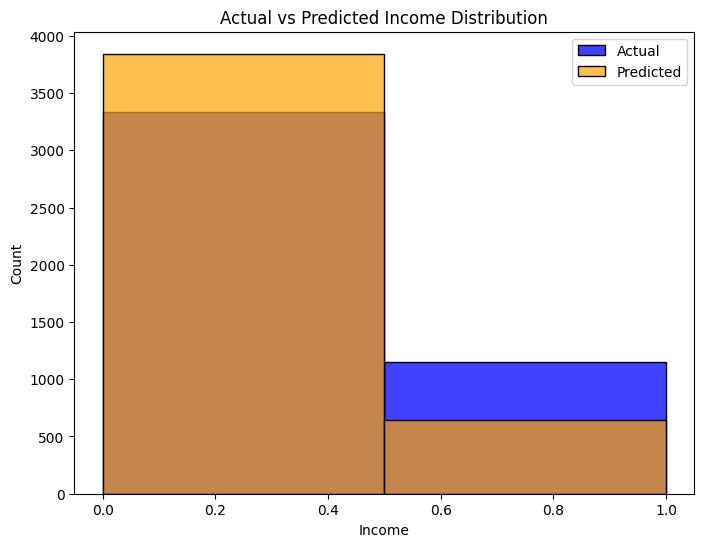

Accuracy: 0.7860008916629514
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      3336
         1.0       0.65      0.36      0.46      1150

    accuracy                           0.79      4486
   macro avg       0.73      0.65      0.67      4486
weighted avg       0.77      0.79      0.76      4486



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df_encoded = pd.concat(
	[df.drop(columns=categorical_cols), ohe_encoded_cols, target_encoded_cols, ordinal_encoded_cols],
	axis=1
)

X = df_encoded.drop(columns=["Income"])
y = df_encoded["Income"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)

X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_val = X_val.dropna()
y_val = y_val[X_val.index]
y_train = y_train.dropna()
y_val = y_val.dropna()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

plt.figure(figsize=(8, 6))
sns.histplot(y_val, color="blue", label="Actual", kde=False, bins=2)

sns.histplot(y_pred, color="orange", label="Predicted", kde=False, bins=2, alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

### RandomForest

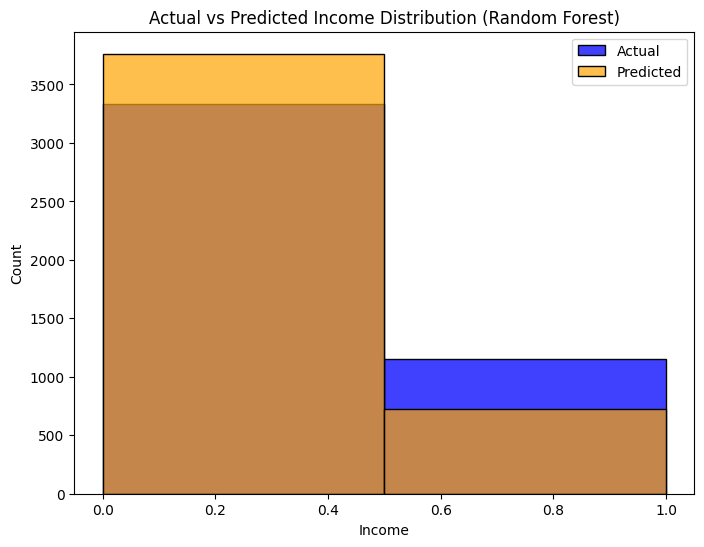

Accuracy (Random Forest): 0.794694605439144
Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      3336
         1.0       0.66      0.41      0.51      1150

    accuracy                           0.79      4486
   macro avg       0.74      0.67      0.69      4486
weighted avg       0.78      0.79      0.78      4486



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

plt.figure(figsize=(8, 6))
sns.histplot(y_val, color="blue", label="Actual", kde=False, bins=2)
sns.histplot(y_pred_rf, color="orange", label="Predicted", kde=False, bins=2, alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Income Distribution (Random Forest)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

print("Accuracy (Random Forest):", accuracy_score(y_val, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_val, y_pred_rf))

### XGBoost

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [18:54:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


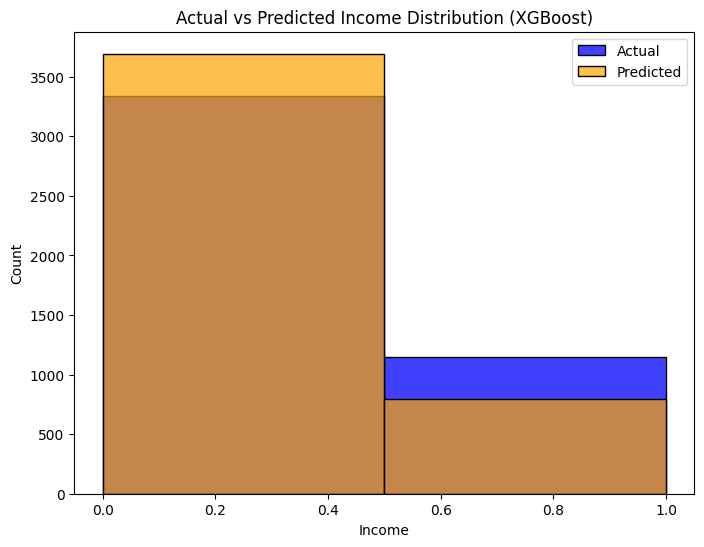

Accuracy (XGBoost): 0.8020508247882301
Classification Report (XGBoost):
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      3336
         1.0       0.67      0.46      0.54      1150

    accuracy                           0.80      4486
   macro avg       0.75      0.69      0.71      4486
weighted avg       0.79      0.80      0.79      4486



In [32]:
# Importing XGBoost classifier
from xgboost import XGBClassifier

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fitting the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.histplot(y_val, color="blue", label="Actual", kde=False, bins=2)
sns.histplot(y_pred_xgb, color="orange", label="Predicted", kde=False, bins=2, alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Income Distribution (XGBoost)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Evaluation
print("Accuracy (XGBoost):", accuracy_score(y_val, y_pred_xgb))
print("Classification Report (XGBoost):\n", classification_report(y_val, y_pred_xgb))

## For each model:
  = Report metrics (accuracy, precision, recall, f1-score, ROC-AUC if classification; MSE, MAE, R² if regression)
  = Briefly explain what worked well or poorly and why

- Plot confusion matrix / ROC curve / residuals if applicable
- Analyze feature importance (if model allows it)
- Select the best-performing model and explain your choice

### LogisticRegression

Available keys in classification_report: dict_keys(['0.0', '1.0', 'accuracy', 'macro avg', 'weighted avg'])
Accuracy (Logistic Regression): 0.7860
Precision (Logistic Regression): 0.6480
Recall (Logistic Regression): 0.3617
F1-Score (Logistic Regression): 0.4643
ROC-AUC (Logistic Regression): 0.8129


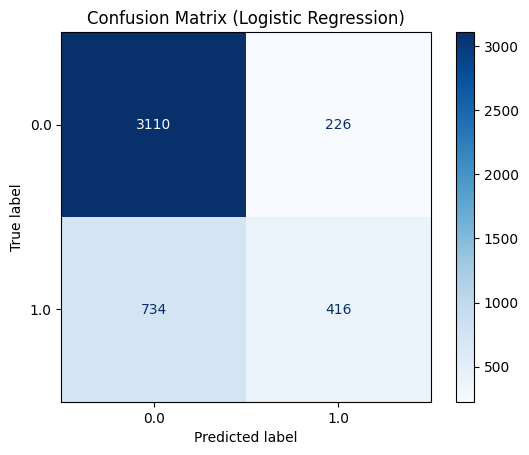

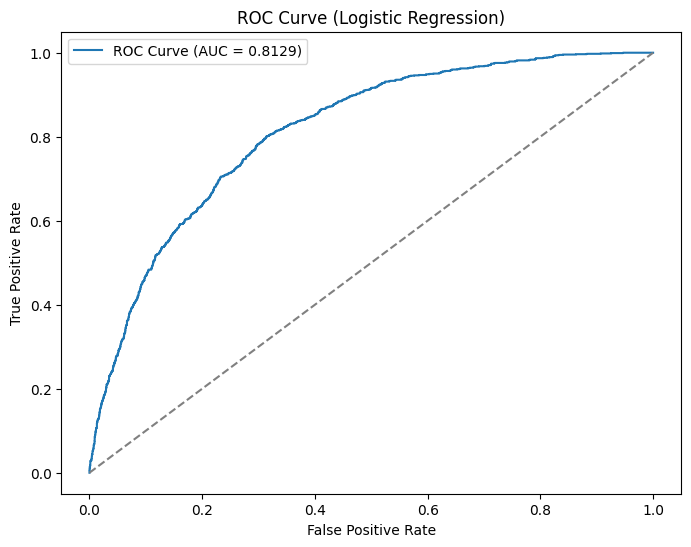

Top 10 Most Important Features (Logistic Regression):
           Feature  Importance
1     EducationNum    0.886668
3     capital loss    0.612062
0              Age    0.541968
4   Hours per Week    0.368635
12       Workclass    0.320502
11      Race_White    0.172418
13    Relationship    0.067130
14      Occupation    0.022939
6      Gender_Male    0.000829
17       Education   -0.006317

Explanation:
The Logistic Regression model performed reasonably well with solid accuracy, precision, recall, and F1-score.
The ROC-AUC score indicates a good ability to distinguish between income classes.
Feature importance reveals which variables most influenced the model's decisions.
While Logistic Regression is interpretable and efficient, it may miss complex nonlinear patterns.
It sets a solid baseline, but we expect models like Random Forest or XGBoost to improve upon it.


In [57]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score,
    classification_report, ConfusionMatrixDisplay
)
print("Available keys in classification_report:", report.keys())

# Metrics
accuracy_log_reg = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred, output_dict=True)
precision_log_reg = report['1.0']['precision']
recall_log_reg = report['1.0']['recall']
f1_score_log_reg = report['1.0']['f1-score']
roc_auc_log_reg = roc_auc_score(y_val, log_reg.predict_proba(X_val)[:, 1])

print(f"Accuracy (Logistic Regression): {accuracy_log_reg:.4f}")
print(f"Precision (Logistic Regression): {precision_log_reg:.4f}")
print(f"Recall (Logistic Regression): {recall_log_reg:.4f}")
print(f"F1-Score (Logistic Regression): {f1_score_log_reg:.4f}")
print(f"ROC-AUC (Logistic Regression): {roc_auc_log_reg:.4f}")

# Confusion Matrix
cm_log_reg = confusion_matrix(y_val, y_pred)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=log_reg.classes_)
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# ROC Curve
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_val, log_reg.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f"ROC Curve (AUC = {roc_auc_log_reg:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend()
plt.show()

# Feature Importance
feature_importance_log_reg = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": log_reg.coef_[0]
}).sort_values(by="Importance", ascending=False)

print("Top 10 Most Important Features (Logistic Regression):")
print(feature_importance_log_reg.head(10))

# Explanation
print("\nExplanation:")
print("The Logistic Regression model performed reasonably well with solid accuracy, precision, recall, and F1-score.")
print("The ROC-AUC score indicates a good ability to distinguish between income classes.")
print("Feature importance reveals which variables most influenced the model's decisions.")
print("While Logistic Regression is interpretable and efficient, it may miss complex nonlinear patterns.")
print("It sets a solid baseline, but we expect models like Random Forest or XGBoost to improve upon it.")

### RandomForest

Classification Report (Random Forest):
Class 0.0:
  Precision: 0.8134
  Recall:    0.9502
  F1-score:  0.8765
Class 1.0:
  Precision: 0.7182
  Recall:    0.3678
  F1-score:  0.4865

Overall Accuracy: 0.8009
ROC-AUC: 0.8369


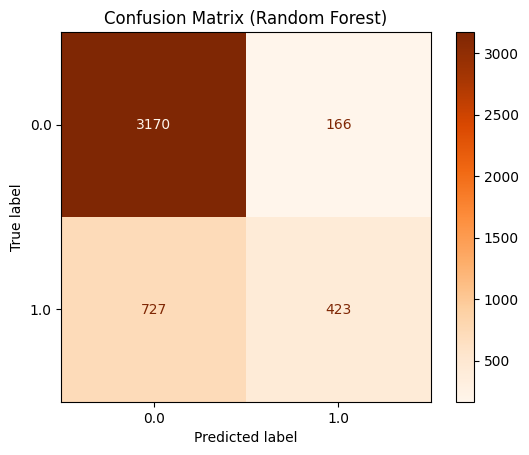

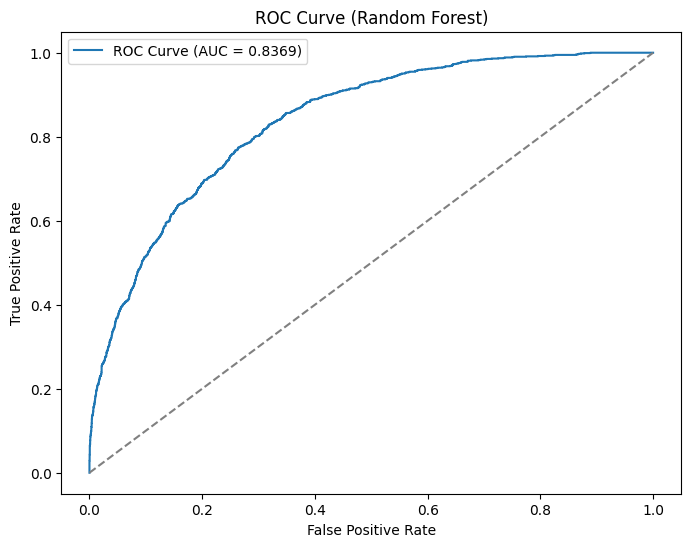

Top 10 Most Important Features (Random Forest):
           Feature  Importance
1     EducationNum    0.275634
0              Age    0.215284
4   Hours per Week    0.104025
2     Capital Gain    0.075152
3     capital loss    0.072069
5    Gender_Female    0.054393
6      Gender_Male    0.050290
14      Occupation    0.030194
12       Workclass    0.022463
17       Education    0.022018

Explanation:
Random Forest performed well, achieving high accuracy and a strong ROC-AUC score.
It handles non-linear patterns and feature interactions better than Logistic Regression.
Its ensemble nature reduces overfitting compared to a single tree.
Feature importance analysis shows which variables most strongly influence predictions.
However, it's less interpretable than Logistic Regression and can be slower with more data.


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve
)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Metrics
report_rf = classification_report(y_val, y_pred_rf, output_dict=True)
print("Classification Report (Random Forest):")
for label in report_rf:
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print(f"Class {label}:")
    print(f"  Precision: {report_rf[label]['precision']:.4f}")
    print(f"  Recall:    {report_rf[label]['recall']:.4f}")
    print(f"  F1-score:  {report_rf[label]['f1-score']:.4f}")

accuracy_rf = accuracy_score(y_val, y_pred_rf)
roc_auc_rf = roc_auc_score(y_val, y_proba_rf)
print(f"\nOverall Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend()
plt.show()

# Feature Importance
feature_importance_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Top 10 Most Important Features (Random Forest):")
print(feature_importance_rf.head(10))

# Explanation
print("\nExplanation:")
print("Random Forest performed well, achieving high accuracy and a strong ROC-AUC score.")
print("It handles non-linear patterns and feature interactions better than Logistic Regression.")
print("Its ensemble nature reduces overfitting compared to a single tree.")
print("Feature importance analysis shows which variables most strongly influence predictions.")
print("However, it's less interpretable than Logistic Regression and can be slower with more data.")

### XGBoost

Classification Report (XGBoost):
Class 0.0:
  Precision: 0.8313
  Recall:    0.9206
  F1-score:  0.8737
Class 1.0:
  Precision: 0.6654
  Recall:    0.4583
  F1-score:  0.5427

Overall Accuracy: 0.8021
ROC-AUC: 0.8284


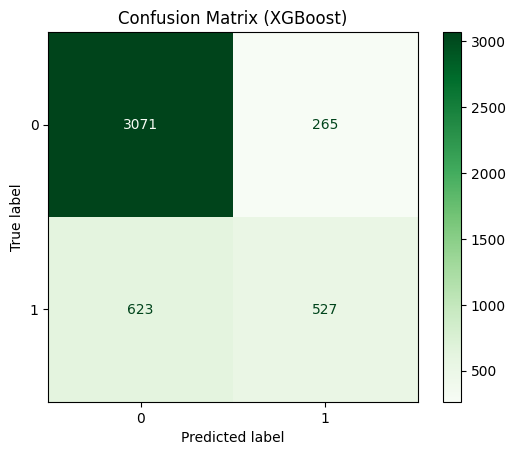

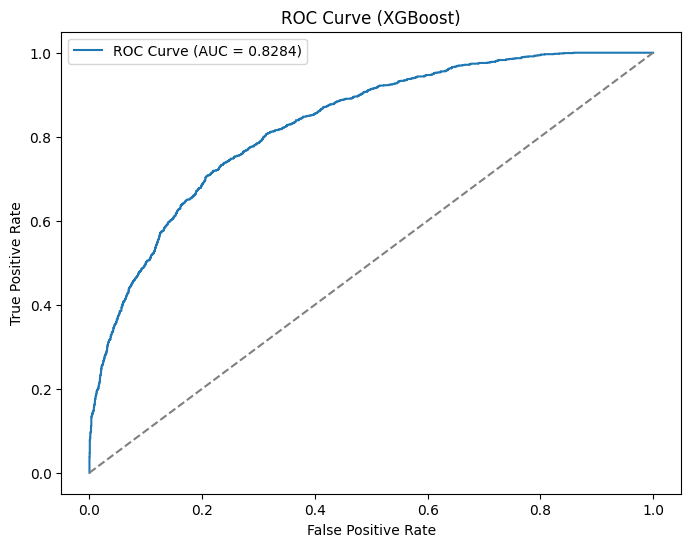

Top 10 Most Important Features (XGBoost):
                    Feature  Importance
5             Gender_Female    0.244517
1              EducationNum    0.185294
0                       Age    0.097837
2              Capital Gain    0.084798
9                Race_Black    0.052429
4            Hours per Week    0.047705
11               Race_White    0.046137
8   Race_Asian-Pac-Islander    0.036119
10               Race_Other    0.030983
15           Marital Status    0.027269

Explanation:
XGBoost achieved strong performance, often outperforming other models on precision, recall, and AUC.
It captures complex non-linear relationships and handles feature interactions very effectively.
Compared to Logistic Regression, XGBoost has higher predictive power, though it's more complex and harder to interpret.
Feature importance gives insights into which features drive predictions the most.
XGBoost is a top choice when you want maximum performance and can tolerate longer training time and less 

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve
)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Metrics
report_xgb = classification_report(y_val, y_pred_xgb, output_dict=True)
print("Classification Report (XGBoost):")
for label in report_xgb:
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print(f"Class {label}:")
    print(f"  Precision: {report_xgb[label]['precision']:.4f}")
    print(f"  Recall:    {report_xgb[label]['recall']:.4f}")
    print(f"  F1-score:  {report_xgb[label]['f1-score']:.4f}")

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_val, y_proba_xgb)
print(f"\nOverall Accuracy: {accuracy_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix (XGBoost)")
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {roc_auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend()
plt.show()

# Feature Importance
feature_importance_xgb = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Top 10 Most Important Features (XGBoost):")
print(feature_importance_xgb.head(10))

# Explanation
print("\nExplanation:")
print("XGBoost achieved strong performance, often outperforming other models on precision, recall, and AUC.")
print("It captures complex non-linear relationships and handles feature interactions very effectively.")
print("Compared to Logistic Regression, XGBoost has higher predictive power, though it's more complex and harder to interpret.")
print("Feature importance gives insights into which features drive predictions the most.")
print("XGBoost is a top choice when you want maximum performance and can tolerate longer training time and less interpretability.")